In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
folder_path = "/content/drive/My Drive/Capstone/preprocessing_csv"
# file_path = "/content/drive/My Drive/Capstone/preprocessing_csv/merged_file_final.csv"
file_path = "/content/drive/My Drive/Capstone/preprocessing_csv/removed_conflicts.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Subject ID,Phase,Sex,Research Group,Archive Date,Study Date,Age,MMSE Total Score,Description,Imaging Protocol,Image ID,FilePath,Research Group Encoded
0,002_S_0295,ADNI 1,M,CN,11-02-2006,2006-02-11,85.4,28.0,MP-RAGE,Slice Thickness=1.2,28561,C:\Users\shahe\OneDrive\Documents\PESU\capston...,1
1,002_S_0295,ADNI 1,M,CN,5/23/2009,2009-05-22,88.0,28.0,MP-RAGE,Slice Thickness=1.2,144447,C:\Users\shahe\OneDrive\Documents\PESU\capston...,1
2,002_S_0295,ADNI 2,M,CN,05-11-2012,2012-10-05,91.0,22.0,MPRAGE,Weighting=T1;Slice Thickness=1.2;Acquisition T...,303066,C:\Users\shach\OneDrive\Documents\SEM_6\Capsto...,1
3,002_S_0413,ADNI 1,F,CN,06-02-2007,2007-01-06,77.5,29.0,MP-RAGE,Slice Thickness=1.2,55771,C:\Users\shahe\OneDrive\Documents\PESU\capston...,1
4,002_S_0413,ADNI 2,F,CN,05-10-2013,2013-10-05,83.4,30.0,MPRAGE,Weighting=T1;Slice Thickness=1.2;Acquisition T...,371991,C:\Users\shach\OneDrive\Documents\SEM_6\Capsto...,1


In [5]:
num_subjects = df["Subject ID"].nunique()
print(f"Total unique subjects: {num_subjects}")

Total unique subjects: 1123


In [6]:
image_counts = df.groupby("Subject ID")["Image ID"].count()

# Display the counts
print(image_counts)

Subject ID
002_S_0295    3
002_S_0413    2
002_S_0559    3
002_S_0619    1
002_S_0685    3
             ..
941_S_4365    4
941_S_4376    4
941_S_4377    3
941_S_4420    3
941_S_4764    3
Name: Image ID, Length: 1123, dtype: int64


In [7]:
subject_distribution = image_counts.value_counts().sort_index()

# Display the distribution
print(subject_distribution)

Image ID
1      5
2    130
3    260
4    399
5    329
Name: count, dtype: int64


In [8]:
single_image_subjects = image_counts[image_counts == 1].count()
print(f"Subjects with only one image: {single_image_subjects}")

Subjects with only one image: 5


In [9]:
multiple_images_subjects = image_counts[image_counts > 5].count()
print(f"Subjects with more than 5 images: {multiple_images_subjects}")

Subjects with more than 5 images: 0


In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Subject ID                0
Phase                     0
Sex                       0
Research Group            0
Archive Date              0
Study Date                0
Age                       0
MMSE Total Score          0
Description               0
Imaging Protocol          0
Image ID                  0
FilePath                  0
Research Group Encoded    0
dtype: int64


In [11]:
missing_filepath_rows = df[df["FilePath"].isnull()]

# Print Image IDs of missing Filepath rows
print("Image IDs with missing Filepath:")
print(missing_filepath_rows["Image ID"].tolist())

Image IDs with missing Filepath:
[]


In [12]:
import os
valid_subjects = image_counts[image_counts > 1].index
df_filtered = df[df["Subject ID"].isin(valid_subjects)]

# Save the new filtered CSV in the same folder
filtered_csv_path = os.path.join(folder_path, "filtered_data.csv")
df_filtered.to_csv(filtered_csv_path, index=False)

print(f"Filtered CSV saved at: {filtered_csv_path}")

Filtered CSV saved at: /content/drive/My Drive/Capstone/preprocessing_csv/filtered_data.csv


In [13]:
new_file_without_singlesub = "/content/drive/My Drive/Capstone/preprocessing_csv/filtered_data.csv"

In [14]:
new_df = pd.read_csv(new_file_without_singlesub)

In [15]:
num_subjects = new_df["Subject ID"].nunique()
print(f"Total unique subjects: {num_subjects}")

Total unique subjects: 1118


In [16]:
image_counts = new_df.groupby("Subject ID")["Image ID"].count()
subject_distribution = image_counts.value_counts().sort_index()
print(subject_distribution)

Image ID
2    130
3    260
4    399
5    329
Name: count, dtype: int64


In [17]:
import numpy as np
image_counts = np.array(subject_distribution.index)
subject_counts = np.array(subject_distribution.values)
total_images = (image_counts * subject_counts).sum()

print(f"Total number of images: {total_images}")


Total number of images: 4281


In [18]:
image_counts = new_df["Subject ID"].value_counts()
subjects_with_excess_images = image_counts[image_counts > 5].index
def prune_extra_images(sub_df):
    return sub_df.sort_values(by='Study Date').head(5)
filtered_df = new_df.groupby("Subject ID", group_keys=False).apply(
    lambda x: prune_extra_images(x) if x.name in subjects_with_excess_images else x
).reset_index(drop=True)

filtered_csv_path = os.path.join(folder_path, "filtered_data_final.csv")
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"✅ Pruned CSV saved at: {filtered_csv_path}")

<ipython-input-18-c9ac3b3e1868>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = new_df.groupby("Subject ID", group_keys=False).apply(


✅ Pruned CSV saved at: /content/drive/My Drive/Capstone/preprocessing_csv/filtered_data_final.csv


In [19]:
new_file_without_morethan5image = "/content/drive/My Drive/Capstone/preprocessing_csv/filtered_data_final.csv"

In [20]:
new_df_1 = pd.read_csv(new_file_without_morethan5image)

In [21]:
image_counts = new_df_1.groupby("Subject ID")["Image ID"].count()
subject_distribution = image_counts.value_counts().sort_index()
print(subject_distribution)

Image ID
2    130
3    260
4    399
5    329
Name: count, dtype: int64


<ipython-input-22-d064b7e683bf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_distribution.index, y=subject_distribution.values, palette="viridis")


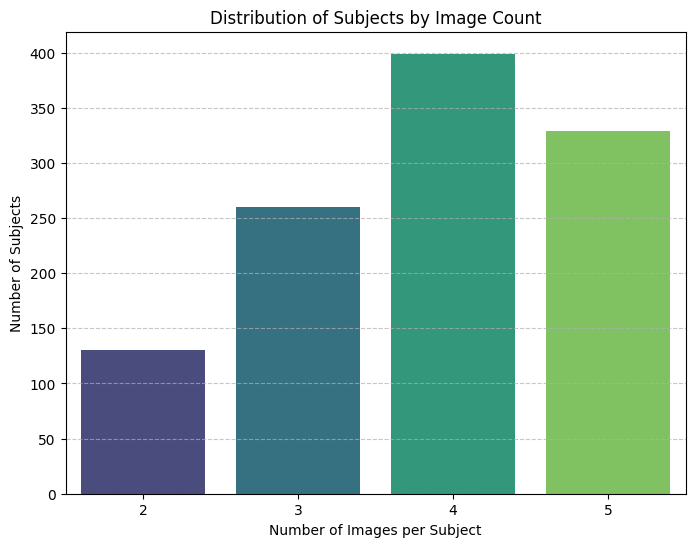

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Count subjects per image count
image_counts = new_df_1.groupby("Subject ID")["Image ID"].count()
subject_distribution = image_counts.value_counts().sort_index()

# ✅ Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=subject_distribution.index, y=subject_distribution.values, palette="viridis")

# ✅ Customize the plot
plt.xlabel("Number of Images per Subject")
plt.ylabel("Number of Subjects")
plt.title("Distribution of Subjects by Image Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ✅ Show the plot
plt.show()


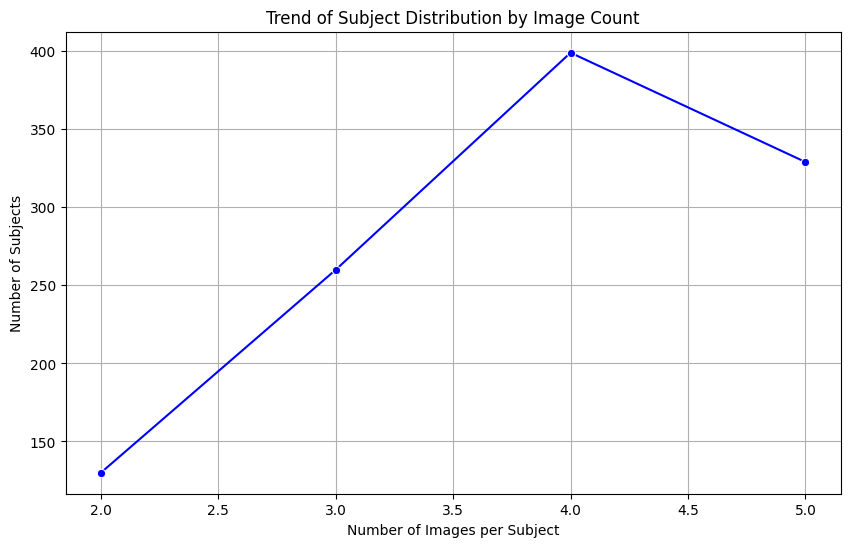

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=subject_distribution.index, y=subject_distribution.values, marker="o", color="blue")

plt.xlabel("Number of Images per Subject")
plt.ylabel("Number of Subjects")
plt.title("Trend of Subject Distribution by Image Count")
plt.grid()
plt.show()


In [24]:
image_counts = np.array(subject_distribution.index)
subject_counts = np.array(subject_distribution.values)
total_images = (image_counts * subject_counts).sum()
print(f"Total number of images: {total_images}")

Total number of images: 4281


In [25]:
missing_values = new_df_1.isnull().sum()
print(missing_values)

Subject ID                0
Phase                     0
Sex                       0
Research Group            0
Archive Date              0
Study Date                0
Age                       0
MMSE Total Score          0
Description               0
Imaging Protocol          0
Image ID                  0
FilePath                  0
Research Group Encoded    0
dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder
df_2 = pd.read_csv("/content/drive/My Drive/Capstone/preprocessing_csv/filtered_data_final.csv")
df_sorted = df_2.sort_values(by=["Subject ID", "Study Date"])
encoder = LabelEncoder()
df_sorted['Research Group Encoded'] = encoder.fit_transform(df_sorted['Research Group'])
df_sorted['MMSE Total Score'] = df_sorted.groupby("Subject ID")['MMSE Total Score'].ffill()
df_sorted['MMSE Total Score'] = df_sorted.groupby("Subject ID")['MMSE Total Score'].bfill()
filled_csv_path = "/content/drive/My Drive/Capstone/preprocessing_csv/filled_mmse_data.csv"
df_sorted.to_csv(filled_csv_path, index=False)
print(f"✅ Filled MMSE dataset saved at: {filled_csv_path}")

✅ Filled MMSE dataset saved at: /content/drive/My Drive/Capstone/preprocessing_csv/filled_mmse_data.csv


In [27]:
filled_mmse = "/content/drive/My Drive/Capstone/preprocessing_csv/filled_mmse_data.csv"

In [28]:
new_df_2 = pd.read_csv(filled_mmse)

In [29]:
missing_values = new_df_2.isnull().sum()
print(missing_values)

Subject ID                0
Phase                     0
Sex                       0
Research Group            0
Archive Date              0
Study Date                0
Age                       0
MMSE Total Score          0
Description               0
Imaging Protocol          0
Image ID                  0
FilePath                  0
Research Group Encoded    0
dtype: int64


In [30]:
num_subjects = new_df_2["Subject ID"].nunique()
print(f"Total unique subjects: {num_subjects}")

Total unique subjects: 1118


In [31]:
num_images = new_df_2["Image ID"].nunique()
print(f"Total unique subjects: {num_images}")

Total unique subjects: 4281


In [33]:
filled_mmse = "/content/drive/My Drive/Capstone/preprocessing_csv/multiple_images_only.csv"

In [34]:
new_df_3 = pd.read_csv(filled_mmse)

In [35]:
subjects_per_group = new_df_3.groupby("Research Group")["Subject ID"].nunique()
print(subjects_per_group)

Research Group
AD      188
CN      313
EMCI    193
LMCI    112
MCI     306
Name: Subject ID, dtype: int64


In [36]:
images_per_group = new_df_3.groupby("Research Group")["Image ID"].count()
print(images_per_group)

Research Group
AD       571
CN      1195
EMCI     669
LMCI     406
MCI     1273
Name: Image ID, dtype: int64


<ipython-input-38-f8fa32baa771>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Research Group', y='Image ID', palette='coolwarm')


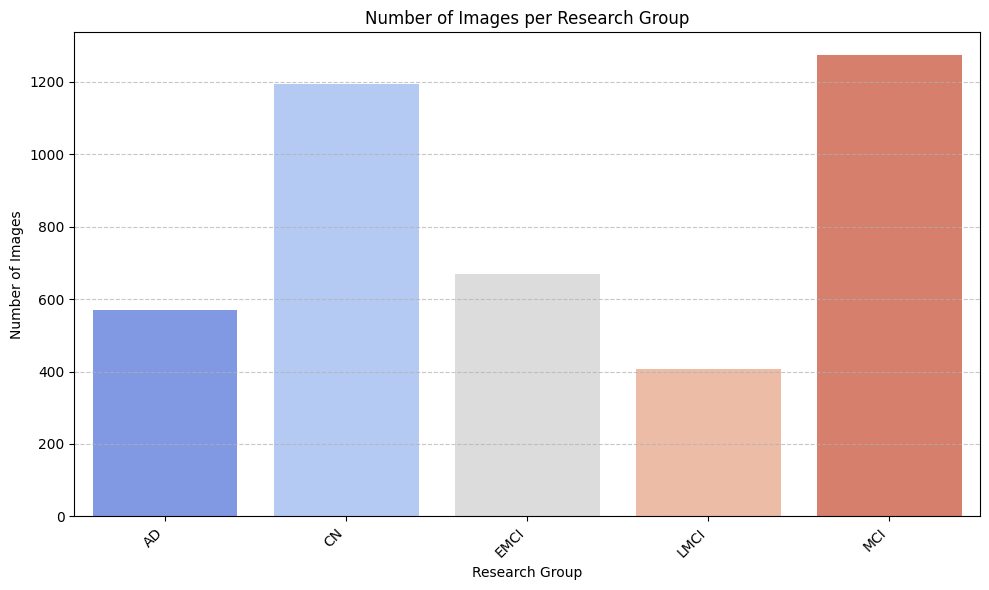

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to convert Series to DataFrame
df_plot = images_per_group.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Research Group', y='Image ID', palette='coolwarm')

plt.title('Number of Images per Research Group')
plt.xlabel('Research Group')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [39]:
image_counts = new_df_2.groupby(["Research Group", "Subject ID"])["Image ID"].count()
subjects_with_n_images = image_counts.groupby(["Research Group", image_counts]).count().unstack(fill_value=0)
print(subjects_with_n_images)

Image ID         2    3    4    5
Research Group                   
AD              35  108   25   24
CN              28   49  152   85
EMCI            32   47  100   14
LMCI             7   30   67    8
MCI             28   26   55  198


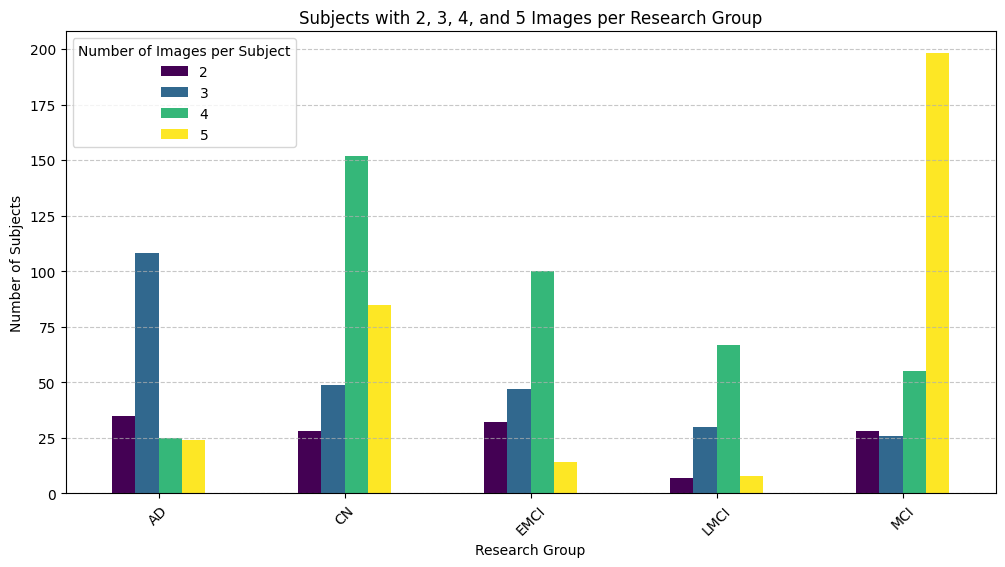

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

subjects_with_n_images[[2, 3, 4, 5]].plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.xlabel("Research Group")
plt.ylabel("Number of Subjects")
plt.title("Subjects with 2, 3, 4, and 5 Images per Research Group")
plt.legend(title="Number of Images per Subject")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
